### Load Library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm
from tcn import TCN

### Read the dataset

In [3]:
dataset = pd.read_excel('DATASET KOMODITAS GROCERY + KATEGORI.xlsx')

In [4]:
# change commodity here
komoditas = 3

In [5]:
isan = dataset.iloc[0:, 5:].transpose()
print(isan.shape)

(108, 87)


In [6]:
data = isan.iloc[0:, komoditas:komoditas+1]
data

,3
2013-01-01,6047
2013-02-01,6281
2013-03-01,6347
2013-04-01,6270
2013-05-01,6379
...,...
2021-08-01,9242
2021-09-01,9466
2021-10-01,9502
2021-11-01,9442


### Parameter: Lookback 12 month windows

In [7]:
lookback_window = 12

### Convert Data into Numpy Array

In [8]:
data = data.values

In [9]:
len(data)

108

### Convert in to X, y format

In [10]:
x = []
y = []
for i in tqdm(range(lookback_window, len(data))):
    x.append(data[i - lookback_window:i])
    y.append(data[i])

  0%|          | 0/96 [00:00<?, ?it/s]

### Generate Array of list x and y

In [11]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(96, 12, 1)
(96, 1)


### Load Model

In [13]:
model = tf.keras.models.load_model('TCN_Willy.h5', custom_objects={'TCN': TCN})

### Prediction with TCN Model

In [14]:
predict = model.predict(x)
# TODO: bikin predict 12 bulan

### Plot the Result

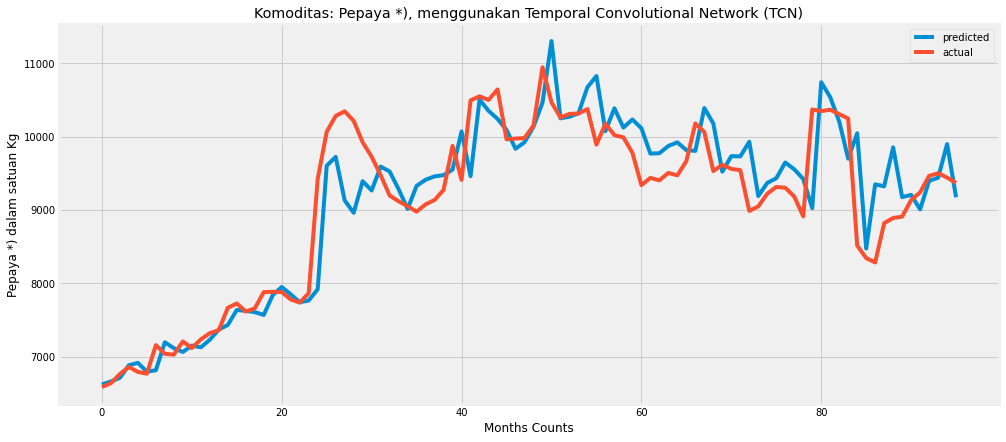

In [15]:
list_komoditas = [i for i in dataset['komoditas']]
list_satuan = [i for i in dataset['satuan']]
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.title('Komoditas: {}, menggunakan Temporal Convolutional Network (TCN)'.format(list_komoditas[komoditas]))
plt.legend(['predicted', 'actual'])
plt.xlabel("Months Counts")
plt.ylabel("{} dalam satuan {}".format(list_komoditas[komoditas], list_satuan[komoditas]))
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y, predict))
print(rmse)

479.86124591941507


In [17]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y, predict)
print(mape)

0.03506597831206292


### Predict the Future

In [18]:
# prediksi tahun 2021
data_2021 = x[95:]
data_2021

array([[[10247],
        [ 8517],
        [ 8346],
        [ 8286],
        [ 8822],
        [ 8892],
        [ 8910],
        [ 9136],
        [ 9242],
        [ 9466],
        [ 9502],
        [ 9442]]])

In [19]:
predict[95:]

array([[9174.668]], dtype=float32)

In [20]:
#new_x = np.array([])
new_x = np.concatenate((x[95:], predict[95:]), axis=None)
new_x = np.array(new_x)
new_x = np.delete(new_x, 0)
new_x = np.array([new_x.astype(int)])
new_x

array([[8517, 8346, 8286, 8822, 8892, 8910, 9136, 9242, 9466, 9502, 9442,
        9174]])

In [21]:
# predict the future for how long
future_months = 24

new_arr = np.zeros(shape=(1, 12))
new_arr = new_arr.astype(int)
for loop in range(future_months):
    pred_2022 = model.predict(new_x)
    new_x = np.concatenate((new_x, pred_2022), axis=None)
    new_x = np.array(new_x)
    new_x = np.delete(new_x, 0)
    new_x = np.array([new_x.astype(int)])
    new_arr = np.append(new_arr, new_x, axis=0)
new_arr = np.delete(new_arr, 0, 0)

In [22]:
new_y = model.predict(new_arr)
new_y

array([[ 8939.293],
       [ 9199.203],
       [ 9557.211],
       [ 9816.467],
       [ 9993.586],
       [ 9921.898],
       [ 9819.422],
       [ 9755.381],
       [ 9830.834],
       [ 9975.664],
       [10087.164],
       [10089.035],
       [10055.113],
       [10084.594],
       [10183.363],
       [10387.242],
       [10583.895],
       [10694.328],
       [10664.006],
       [10574.719],
       [10532.471],
       [10601.867],
       [10766.504],
       [10936.879]], dtype=float32)

In [23]:
new_y = np.append(predict, new_y, axis=0)

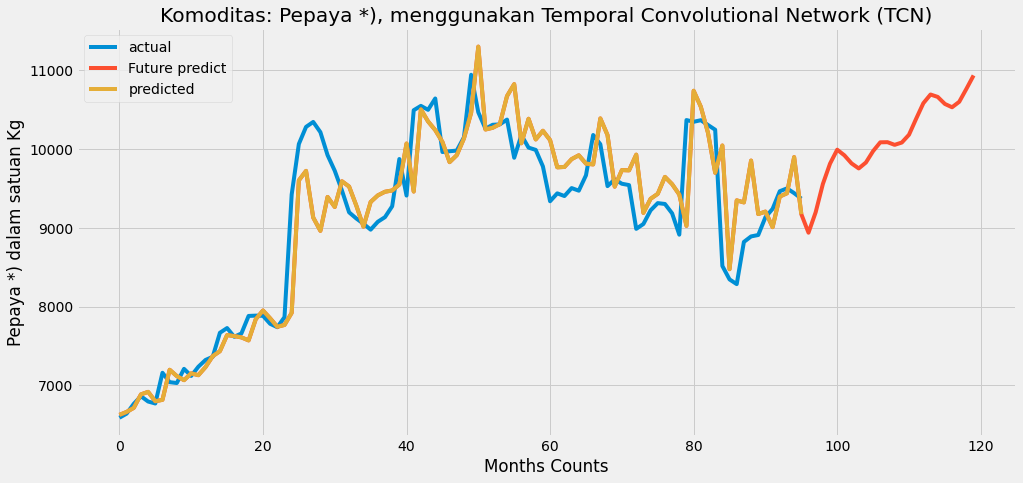

In [24]:
list_komoditas = [i for i in dataset['komoditas']]
list_satuan = [i for i in dataset['satuan']]
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(y)
plt.plot(new_y)
plt.plot(predict)
plt.title('Komoditas: {}, menggunakan Temporal Convolutional Network (TCN)'.format(list_komoditas[komoditas]))
plt.legend(['actual', 'Future predict', 'predicted'])
plt.xlabel("Months Counts")
plt.ylabel("{} dalam satuan {}".format(list_komoditas[komoditas], list_satuan[komoditas]))
plt.show()